In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Understanding & EDA

In [164]:
data_raw = pd.read_csv('loan_data_2007_2014.csv')
data_raw.head()

C:\Users\rizky\AppData\Local\Temp\ipykernel_23472\4200974262.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [166]:
data_raw.select_dtypes(include='object').columns.to_list()

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

`Temuan`

1. term, grade, emp_length, home_ownership akan dirubah menjadi `int`
2. issue_d, last_pymnt_d, next_pymnt_d akan dirubah menjadi `datetime`
3. loan_status akan menjadi dasar sumber dari `target model`

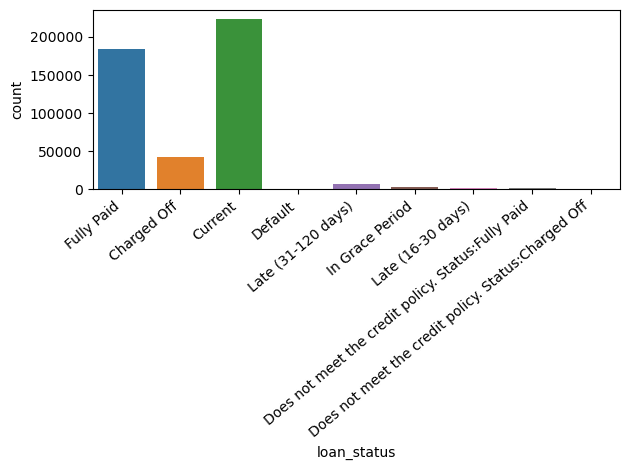

In [167]:
# persebaran jumlah data loan_status

ax = sns.countplot(x="loan_status", data=data_raw)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

`Temuan`

1. Dapat dipastikan Fully paid (pembayaran lunas) akan menjadi nilai positif atau `good loan`
2. Charged Off (pembayaran macet) dan Default (gagal bayar) akan menjadi nilai negatif atau `bad loan`
3. Current (pembayaran lancar) dan status yang lain akan dipertanyakan, umumnya akan menjadi `good loan` namun saya akan membuat threshold beberapa data menjadi `bad loan` karena tujuan dari model ini untuk memprediksi risk dari loan tersebut.


In [168]:
# Find duplicate records
duplicates = data_raw.duplicated()
# Print the number of duplicate records
print("Number of duplicate records:", duplicates.sum())

Number of duplicate records: 0


In [169]:
print ("{:.0%} Data Unique".format(len(data_raw) / data_raw['member_id'].nunique()))

100% Data Unique


`Temuan`

Tidak ditemukan duplikat data, dapat disimpulkan bahwa dataset benar merupakan data member loaners bukan transaksi

In [170]:
data_raw.groupby('loan_status')['int_rate'].mean()

loan_status
Charged Off                                            15.998834
Current                                                13.773271
Default                                                16.136394
Does not meet the credit policy. Status:Charged Off    14.597148
Does not meet the credit policy. Status:Fully Paid     13.978642
Fully Paid                                             13.255943
In Grace Period                                        15.827072
Late (16-30 days)                                      15.964466
Late (31-120 days)                                     15.947754
Name: int_rate, dtype: float64

In [171]:
data_raw.groupby('loan_status')['out_prncp_inv'].mean()

loan_status
Charged Off                                                0.000000
Current                                                 8636.486069
Default                                                10526.187320
Does not meet the credit policy. Status:Charged Off        0.000000
Does not meet the credit policy. Status:Fully Paid         0.000000
Fully Paid                                                 0.000000
In Grace Period                                         9378.247018
Late (16-30 days)                                       9469.588440
Late (31-120 days)                                     10039.815123
Name: out_prncp_inv, dtype: float64

<Axes: xlabel='home_ownership', ylabel='count'>

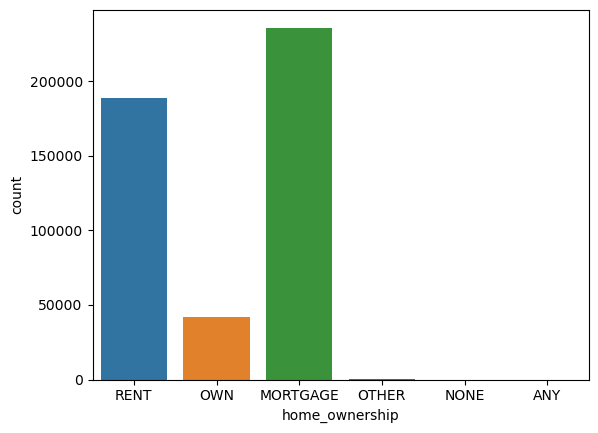

In [172]:
sns.countplot(x="home_ownership", data=data_raw)

In [173]:
data_raw[data_raw['home_ownership']=='RENT'].groupby('loan_status')['loan_status'].count().sort_values(ascending=False)

loan_status
Current                                                85911
Fully Paid                                             76025
Charged Off                                            19906
Late (31-120 days)                                      3097
In Grace Period                                         1376
Does not meet the credit policy. Status:Fully Paid       911
Late (16-30 days)                                        483
Default                                                  412
Does not meet the credit policy. Status:Charged Off      352
Name: loan_status, dtype: int64

In [174]:
data_raw[data_raw['home_ownership']=='MORTGAGE'].groupby('loan_status')['loan_status'].count().sort_values(ascending=False)

loan_status
Current                                                117038
Fully Paid                                              93221
Charged Off                                             18799
Late (31-120 days)                                       3142
In Grace Period                                          1461
Does not meet the credit policy. Status:Fully Paid        908
Late (16-30 days)                                         607
Default                                                   351
Does not meet the credit policy. Status:Charged Off       348
Name: loan_status, dtype: int64

In [175]:
data_raw[data_raw['home_ownership']=='OWN'].groupby('loan_status')['loan_status'].count().sort_values(ascending=False)

loan_status
Current                                                21272
Fully Paid                                             15342
Charged Off                                             3736
Late (31-120 days)                                       661
In Grace Period                                          309
Does not meet the credit policy. Status:Fully Paid       138
Late (16-30 days)                                        128
Default                                                   69
Does not meet the credit policy. Status:Charged Off       49
Name: loan_status, dtype: int64

`Temuan`

1. Home ownership tidak terlalu mempengaruhi loan_status
2. Disamping itu karena data `bad_loan` sendiri juga tidak terlalu banyak dibandingkan `good_loan` dan status loan lainnya

# Data Preprocessing

## Feature Selection

`Berdasarkan feature importance pada notebook CreditRisk_FeatureImportance dan asumsi`

In [176]:
df = data_raw[['loan_amnt','funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'issue_d',
               'loan_status','dti','delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec',
               'revol_bal', 'revol_util', 'total_acc', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_d', 'last_credit_pull_d']].copy()

## Missing Value

In [177]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record    86.566585
mths_since_last_delinq    53.690554
emp_length                 4.505399
last_pymnt_d               0.080637
revol_util                 0.072917
last_credit_pull_d         0.009007
delinq_2yrs                0.006219
inq_last_6mths             0.006219
open_acc                   0.006219
pub_rec                    0.006219
total_acc                  0.006219
annual_inc                 0.000858
dtype: float64

In [178]:
# drop missing value > 75%
df.drop('mths_since_last_record', axis=1, inplace=True)

In [179]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['emp_length'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(0, inplace=True)
df.dropna(subset=['last_pymnt_d', 'last_credit_pull_d'], inplace=True)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465867 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               465867 non-null  int64  
 1   funded_amnt             465867 non-null  int64  
 2   term                    465867 non-null  object 
 3   int_rate                465867 non-null  float64
 4   installment             465867 non-null  float64
 5   grade                   465867 non-null  object 
 6   emp_length              465867 non-null  object 
 7   home_ownership          465867 non-null  object 
 8   annual_inc              465867 non-null  float64
 9   issue_d                 465867 non-null  object 
 10  loan_status             465867 non-null  object 
 11  dti                     465867 non-null  float64
 12  delinq_2yrs             465867 non-null  float64
 13  inq_last_6mths          465867 non-null  float64
 14  mths_since_last_deli

## Feature Engineering

In [181]:
df_train = df.copy()

### `mths_check`
Perbedaan jumlah bulan dari tgl pengecekan terakhir credit history dan tgl pembayaran terakhir

In [182]:
df_train['last_credit_pull_d'] = pd.to_datetime(df_train['last_credit_pull_d'], format='%b-%y')
df_train['last_pymnt_d'] = pd.to_datetime(df_train['last_pymnt_d'], format='%b-%y')
df_train['mths_check'] = round((df_train['last_credit_pull_d'] - df_train['last_pymnt_d'])/np.timedelta64(1, 'M'))

In [183]:
print(df_train[:1]['last_credit_pull_d'])
print(df_train[:1]['last_pymnt_d'])
print(df_train[:1]['mths_check'])

0   2016-01-01
Name: last_credit_pull_d, dtype: datetime64[ns]
0   2015-01-01
Name: last_pymnt_d, dtype: datetime64[ns]
0    12.0
Name: mths_check, dtype: float64


In [184]:
df_train[df_train['loan_status']=='Default']['mths_check'].describe()

count    832.000000
mean       4.566106
std        1.221727
min       -7.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        7.000000
Name: mths_check, dtype: float64

In [185]:
df_train[df_train['loan_status']=='Charged Off']['mths_check'].describe()

count    42105.000000
mean        10.319273
std         11.815916
min        -18.000000
25%          5.000000
50%          5.000000
75%         11.000000
max         94.000000
Name: mths_check, dtype: float64

In [186]:
df_train[df_train['loan_status']=='Fully Paid']['mths_check'].describe()

count    184724.000000
mean          7.689082
std          10.695265
min         -44.000000
25%           0.000000
50%           3.000000
75%          12.000000
max          92.000000
Name: mths_check, dtype: float64

In [187]:
df_train[(df_train['loan_status']=='Fully Paid') &
         (df_train['mths_check']>5)]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_rec_late_fee,last_pymnt_d,last_credit_pull_d,mths_check
0,5000,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Dec-11,...,3.0,0.0,13648,83.7,9.0,0.0,0.0,2015-01-01,2016-01-01,12.0
2,2400,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Dec-11,...,2.0,0.0,2956,98.5,10.0,0.0,0.0,2014-06-01,2016-01-01,19.0
5,5000,5000,36 months,7.90,156.46,A,3 years,RENT,36000.0,Dec-11,...,9.0,0.0,7963,28.3,12.0,0.0,0.0,2015-01-01,2015-09-01,8.0
10,6500,6500,60 months,14.65,153.45,C,5 years,OWN,72000.0,Dec-11,...,14.0,0.0,4032,20.6,23.0,0.0,0.0,2013-06-01,2015-12-01,30.0
13,3000,3000,36 months,9.91,96.68,B,3 years,RENT,15000.0,Dec-11,...,11.0,0.0,7323,43.1,11.0,0.0,0.0,2015-01-01,2016-01-01,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466241,7200,7200,36 months,14.98,249.52,C,< 1 year,RENT,35000.0,Jan-14,...,6.0,0.0,3956,74.6,15.0,0.0,0.0,2015-05-01,2016-01-01,8.0
466259,18000,18000,36 months,15.61,629.37,C,4 years,RENT,48000.0,Jan-14,...,9.0,1.0,6126,66.6,18.0,0.0,0.0,2015-07-01,2016-01-01,6.0
466263,15250,15250,36 months,17.57,548.05,D,10+ years,MORTGAGE,65000.0,Jan-14,...,8.0,2.0,6122,15.2,26.0,0.0,0.0,2014-04-01,2015-09-01,17.0
466265,32000,32000,36 months,7.90,1001.29,A,0,MORTGAGE,128000.0,Jan-14,...,11.0,0.0,5400,17.5,35.0,0.0,0.0,2015-04-01,2015-12-01,8.0


In [188]:
df_train[df_train['loan_status']=='Current']['mths_check'].describe()

count    224207.000000
mean          0.177809
std           0.817661
min         -49.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: mths_check, dtype: float64

In [189]:
print(df_train[(df_train['loan_status']=='Current') &
         (df_train['mths_check']<0)][:1]['last_credit_pull_d'])
print(df_train[(df_train['loan_status']=='Current') &
         (df_train['mths_check']<0)][:1]['last_pymnt_d'])
print(df_train[(df_train['loan_status']=='Current') &
         (df_train['mths_check']<0)][:1]['mths_check'])

1116   2013-03-01
Name: last_credit_pull_d, dtype: datetime64[ns]
1116   2016-01-01
Name: last_pymnt_d, dtype: datetime64[ns]
1116   -34.0
Name: mths_check, dtype: float64


### `finish_d`  
Tanggal dimana pembayaran seharusnya selesai sesuai term

In [190]:
df_train['term'] = df_train['term'].str.replace(' months', '')
df_train['term'] = df_train['term'].astype('int')

In [191]:
df_train['issue_d'] = pd.to_datetime(df_train['issue_d'], format='%b-%y')
df_train['finish_d'] = ((df_train['issue_d'].dt.to_period('M')) + df_train['term']).dt.to_timestamp()

### `mths_remain` 
Jumlah bulan yang tersisa untuk menyelesaikan pembayaran sesuai finish_d

In [192]:
df_train['mths_remain'] = round((df_train['finish_d'] - df_train['last_pymnt_d'])/np.timedelta64(1, 'M'))

In [193]:
print(df_train[:1]['finish_d'])
print(df_train[:1]['last_pymnt_d'])
print(df_train[:1]['mths_remain'])

0   2014-12-01
Name: finish_d, dtype: datetime64[ns]
0   2015-01-01
Name: last_pymnt_d, dtype: datetime64[ns]
0   -1.0
Name: mths_remain, dtype: float64


### `paid_potention` 
Kemampuan loaners untuk membayar sisa pembayaran sampai tanggal penyelesaian sesuai dengan income

In [194]:
df_train['paid_potention'] = round(((df_train['annual_inc']/12) * df_train['mths_remain']) - df_train['out_prncp_inv'])

In [195]:
len(df_train[(df_train['loan_status']=='Current') &
         (df_train['paid_potention']<0)])

370

### emp_length

In [196]:
df_train = df_train.replace({'emp_length' : { '< 1 year' : '0 years', '1 year' : '1 years', '10+ years' : '10 years'}})
df_train['emp_length'] = df_train['emp_length'].fillna('0 years')
df_train['emp_length'] = df_train['emp_length'].replace(' years', '', regex=True)
df_train['emp_length'] = df_train['emp_length'].astype('int')
df_train['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

### home_ownership

In [197]:
df_train = df_train.replace({'home_ownership' : { 'MORTGAGE' : 0, 'RENT' : 0, 'OWN' : 1, 'NONE': 1, 'ANY':1, 'OTHER':1}})

###  grade

In [198]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df_train['grade'] = le.fit_transform(df_train['grade'])
#df_train['verification_status']=le.fit_transform(df_train['verification_status'])
#df_train['initial_list_status']=le.fit_transform(df_train['initial_list_status'])

### `risk` - TARGET Modelling

In [199]:
df_train['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [200]:
bad = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off'
]

df_train['risk'] = np.where(df_train['loan_status'].isin(bad), 1, 0)

In [201]:
df_train['risk'].value_counts(normalize=True)*100

0    90.622646
1     9.377354
Name: risk, dtype: float64

In [202]:
df_train.loc[((df_train['loan_status']=='Current') & ((df_train['mths_check']>=3) | (df_train['paid_potention']<0))), 'risk'] = 1
df_train.loc[((df_train['loan_status']=='Late (31-120 days)') & ((df_train['mths_check']>=3) | (df_train['paid_potention']<0))), 'risk'] = 1
df_train.loc[((df_train['loan_status']=='Late (16-30 days)') & ((df_train['mths_check']>=3) | (df_train['paid_potention']<0))), 'risk'] = 1
df_train.loc[((df_train['loan_status']=='In Grace Period') & ((df_train['mths_check']>=3) | (df_train['paid_potention']<0))), 'risk'] = 1

In [203]:
df_train['risk'].value_counts(normalize=True)*100

0    89.784638
1    10.215362
Name: risk, dtype: float64

## Feature Transformation

### Split Data

In [204]:
X = df_train[['loan_amnt','funded_amnt', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'dti','delinq_2yrs', 
            'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc', 'out_prncp_inv',
            'total_rec_late_fee', 'mths_check', 'mths_remain', 'paid_potention']].copy()
y = df_train['risk'].copy()

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

349400
116467


### SMOTE Imbalanced Data

In [206]:
y_train.value_counts()

0    313801
1     35599
Name: risk, dtype: int64

<Axes: xlabel='risk', ylabel='count'>

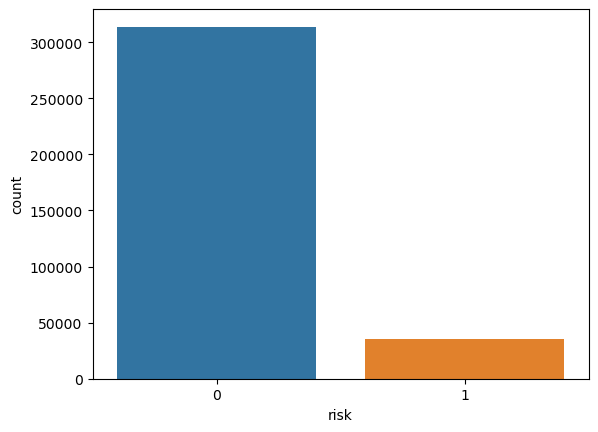

In [207]:
sns.countplot(x=y_train, data=y_train)

In [208]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [209]:
y_smote.value_counts()

0    313801
1    313801
Name: risk, dtype: int64

<Axes: xlabel='risk', ylabel='count'>

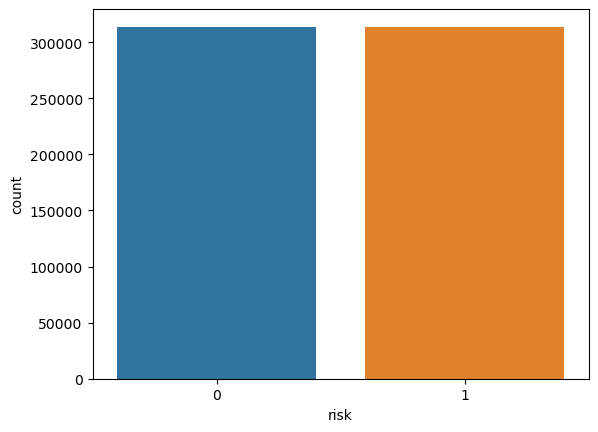

In [210]:
sns.countplot(x=y_smote)

### Standarization

In [211]:
X_smote.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,dti,delinq_2yrs,inq_last_6mths,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_rec_late_fee,mths_check,mths_remain,paid_potention
0,8400,8400,14.33,288.45,2,1,0,19.28,0.0,0.0,...,5.0,0.0,3739,85.0,15.0,0.00,0.0,11.0,15.0,55000.0
1,7200,7200,19.52,265.83,4,0,0,27.19,1.0,0.0,...,7.0,0.0,7387,48.0,8.0,4696.54,0.0,0.0,21.0,30303.0
2,17000,17000,7.69,530.30,0,5,0,16.38,0.0,0.0,...,7.0,0.0,13163,71.9,11.0,9924.35,0.0,0.0,19.0,66076.0
3,18825,18825,16.59,463.71,3,8,0,10.20,0.0,1.0,...,11.0,0.0,9880,14.4,27.0,0.00,0.0,14.0,52.0,182000.0
4,14000,14000,16.99,347.87,3,2,0,22.43,1.0,3.0,...,32.0,0.0,15388,47.3,63.0,0.00,0.0,12.0,49.0,326667.0


In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_smote[:])
X_smote[:] = scaler.transform(X_smote[:])
X_test[:] = scaler.transform(X_test[:])

In [213]:
X_smote.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,emp_length,home_ownership,dti,delinq_2yrs,inq_last_6mths,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_rec_late_fee,mths_check,mths_remain,paid_potention
0,-0.724038,-0.721936,-0.106582,-0.607585,0.065997,-1.264822,-0.237783,0.218940,-0.382655,-0.842097,...,-1.322078,-0.339622,-0.615488,1.231937,-0.89208,-0.511422,-0.215763,0.418289,-0.764503,-0.659238
1,-0.868718,-0.866858,1.135539,-0.700868,1.670353,-1.550040,-0.237783,1.297677,0.987374,-0.842097,...,-0.890693,-0.339622,-0.427433,-0.436417,-1.53832,0.332138,-0.215763,-0.678925,-0.346300,-0.829200
2,0.312835,0.316667,-1.695731,0.389778,-1.538360,-0.123952,-0.237783,-0.176551,-0.382655,-0.842097,...,-0.890693,-0.339622,-0.129679,0.641249,-1.26136,1.271121,-0.215763,-0.678925,-0.485701,-0.583014
3,0.532869,0.537068,0.434303,0.115168,0.868175,0.731701,-0.237783,-1.019357,-0.382655,0.084523,...,-0.027924,-0.339622,-0.298918,-1.951462,0.21576,-0.511422,-0.215763,0.717529,1.814419,0.214762
4,-0.048865,-0.045636,0.530035,-0.362544,0.868175,-0.979605,-0.237783,0.648526,0.987374,1.937763,...,4.501614,-0.339622,-0.014980,-0.467980,3.53928,-0.511422,-0.215763,0.518036,1.605317,1.210344


# Modelling

## Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    104476
           1       0.67      0.65      0.66     11991

    accuracy                           0.93    116467
   macro avg       0.82      0.81      0.81    116467
weighted avg       0.93      0.93      0.93    116467



##  Logistic

In [215]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_smote, y_smote)
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88    104476
           1       0.29      0.65      0.40     11991

    accuracy                           0.80    116467
   macro avg       0.62      0.73      0.64    116467
weighted avg       0.88      0.80      0.83    116467



## KNN

In [216]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_smote, y_smote)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87    104476
           1       0.27      0.65      0.38     11991

    accuracy                           0.79    116467
   macro avg       0.61      0.72      0.63    116467
weighted avg       0.88      0.79      0.82    116467



## XGBoost

In [217]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_smote, y_smote)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    104476
           1       0.77      0.60      0.67     11991

    accuracy                           0.94    116467
   macro avg       0.86      0.79      0.82    116467
weighted avg       0.94      0.94      0.94    116467



# Feature Importance 2

In [218]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = feature_names
df_feature_importance['importance'] = feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
18,mths_check,0.421653
16,out_prncp_inv,0.093005
9,inq_last_6mths,0.079273
19,mths_remain,0.074140
2,int_rate,0.052306
20,paid_potention,0.036929
17,total_rec_late_fee,0.028965
5,emp_length,0.026026
10,mths_since_last_delinq,0.022457
7,dti,0.018162


Text(0.5, 0, 'Feature Importance')

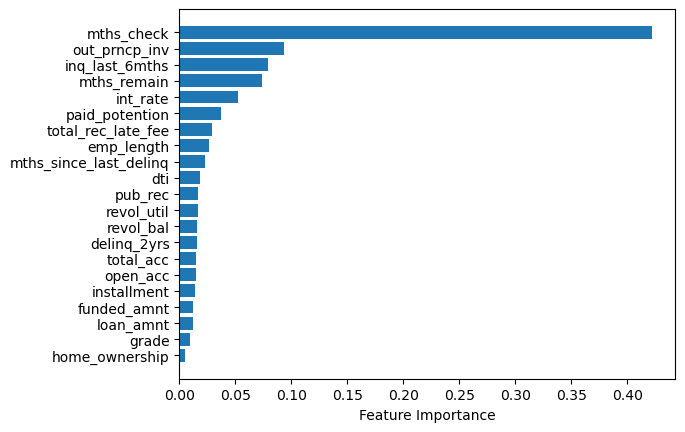

In [219]:
sort = rf.feature_importances_.argsort()
plt.barh(df_feature_importance['feature'][sort], df_feature_importance['importance'][sort])
plt.xlabel("Feature Importance")

In [238]:
from sklearn.preprocessing import MinMaxScaler()

Xnew = df_train[['mths_check', 'out_prncp_inv', 'inq_last_6mths', 'mths_remain', 'int_rate', 'paid_potention',  'emp_length',
                'total_rec_late_fee', 'mths_since_last_delinq']].copy()
ynew = df_train['risk'].copy()

Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(Xnew, ynew, test_size=0.25,
                                                    random_state=42)

Xnew_smote, ynew_smote = oversample.fit_resample(Xnew_train, ynew_train)

scaler_new = MinMaxScaler()
scaler_new.fit(Xnew_smote[:])
Xnew_smote[:] = scaler_new.transform(Xnew_smote[:])
Xnew_test[:] = scaler_new.transform(Xnew_test[:])

In [250]:
ynew.loc[1000]

0

In [251]:
Xnew.iloc[1000]

mths_check                    1.00
out_prncp_inv                 0.00
inq_last_6mths                1.00
mths_remain                  18.00
int_rate                     14.27
paid_potention            36000.00
emp_length                    5.00
total_rec_late_fee            0.00
mths_since_last_delinq        0.00
Name: 1001, dtype: float64

In [241]:
Xnew_smote.iloc[3]

mths_check                0.771695
out_prncp_inv            -0.512450
inq_last_6mths            0.095390
mths_remain               1.801102
int_rate                  0.431994
paid_potention            0.214399
emp_length                0.720344
total_rec_late_fee       -0.192876
mths_since_last_delinq   -0.701875
Name: 3, dtype: float64

In [223]:
ynew.iloc[4]

0

# Hyperparameter Tuning

In [224]:
from sklearn.model_selection import RandomizedSearchCV

In [225]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [226]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(Xnew_smote, ynew_smote)

# ReModelling

In [227]:
rf_new = RandomForestClassifier(n_estimators=400, max_depth=10,min_samples_leaf=1,max_features='sqrt',
                             min_samples_split=5, criterion='gini')
rf_new.fit(Xnew_smote, ynew_smote)
y_pred_rf_new = rf_new.predict(Xnew_test)
print(classification_report(ynew_test, y_pred_rf_new))


              precision    recall  f1-score   support

           0       0.98      0.88      0.93    104476
           1       0.45      0.86      0.59     11991

    accuracy                           0.88    116467
   macro avg       0.71      0.87      0.76    116467
weighted avg       0.93      0.88      0.89    116467



# Evaluation

## Confusion Matrix

In [228]:
from sklearn.metrics import confusion_matrix

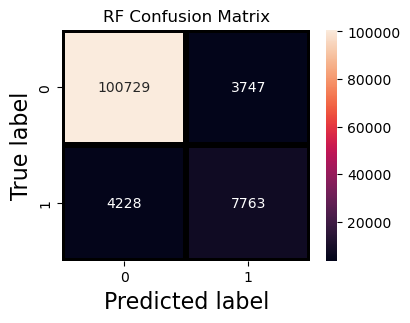

In [229]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RF Confusion Matrix",fontsize=12)
plt.ylabel('True label',fontdict={'size':'16'})
plt.xlabel('Predicted label',fontdict={'size':'16'})
plt.show()

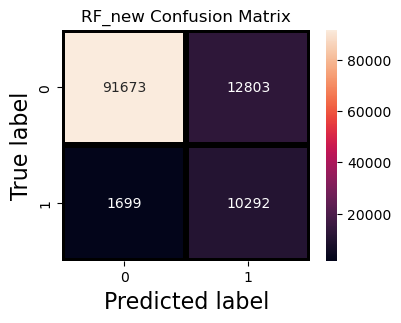

In [230]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(ynew_test, y_pred_rf_new),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RF_new Confusion Matrix",fontsize=12)
plt.ylabel('True label',fontdict={'size':'16'})
plt.xlabel('Predicted label',fontdict={'size':'16'})
plt.show()

## AUC

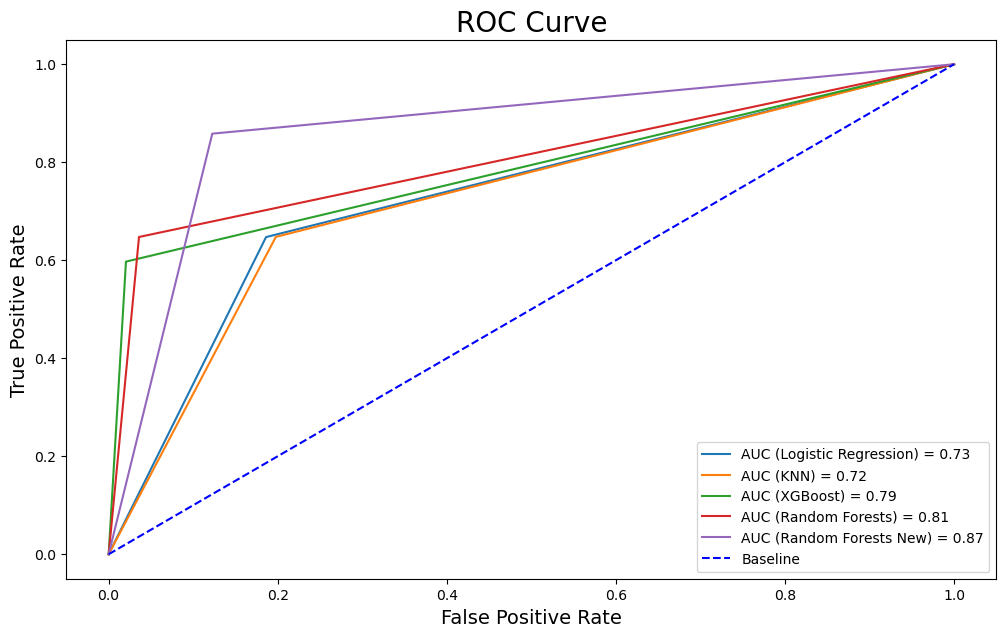

In [231]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_int = y_test
y_test_int_new = ynew_test

auc_lr = roc_auc_score(y_test_int, y_pred_log)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, y_pred_log)

auc_knn = roc_auc_score(y_test_int, y_pred_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_int, y_pred_knn)

auc_rf = roc_auc_score(y_test_int, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, y_pred_rf)

auc_rf_new = roc_auc_score(y_test_int_new, y_pred_rf_new)
fpr_rf_new, tpr_rf_new, thresholds_rf_new = roc_curve(y_test_int_new, y_pred_rf_new)

auc_xg = roc_auc_score(y_test_int, y_pred_xgb)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, y_pred_xgb)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_rf_new, tpr_rf_new, label=f'AUC (Random Forests New) = {auc_rf_new:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

## KS

In [232]:
y_pred_proba = rf_new.predict_proba(Xnew_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(ynew_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = ynew_test.index

df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [233]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,412245,0,0.000105,1,0,1,0.000009,0.0,0.000010
1,414578,0,0.000107,2,0,2,0.000017,0.0,0.000019
2,259855,0,0.000112,3,0,3,0.000026,0.0,0.000029
3,251900,0,0.000112,4,0,4,0.000034,0.0,0.000038
4,243273,0,0.000115,5,0,5,0.000043,0.0,0.000048


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.7651')

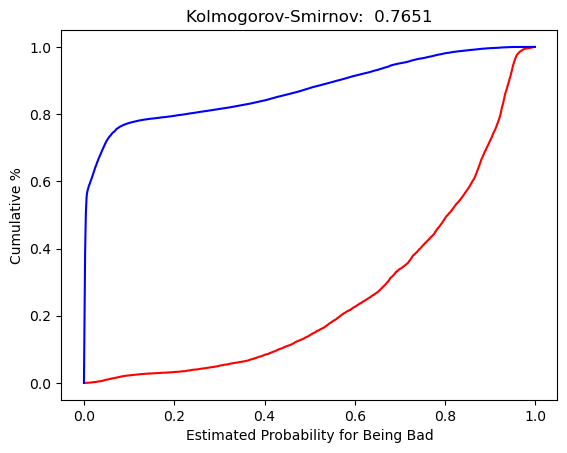

In [234]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

# Save Model

In [235]:
import pickle

model_columns = list(Xnew.columns)
model_columns

# saving the model  
with open('model.pkl','wb') as file:
    pickle.dump(rf_new, file)

# saving the model columns
with open('model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)

# saving the model scaler
with open('model_scaler.pkl','wb') as file:
    pickle.dump(scaler_new, file)    

In [236]:
trained_load_model = pickle.load(open("model_columns.pkl", "rb"))
trained_load_model

['mths_check',
 'out_prncp_inv',
 'inq_last_6mths',
 'mths_remain',
 'int_rate',
 'paid_potention',
 'emp_length',
 'total_rec_late_fee',
 'mths_since_last_delinq']